# Curso de Optimización I (DEMAT/CIMAT)
# Tarea 2

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Febrero  4, 2024**    |
| Fecha límite de entrega de la tarea: | **Febrero 11, 2024**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales. 
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook 
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar 
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función. 
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados para poder usarlos, 
y por eso no es conveniente que la función sólo imprima los valores 
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir
el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

---

## Ejercicio 1 (2 puntos)

Estimar la cantidad de iteraciones que requiere el algoritmo de descenso máximo
con paso exacto para alcanzar el minimizador  $\mathbf{x}_*$ de la función 
cuadrática 

$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 

donde $\mathbf{A}$ es una matriz simétrica y definida positiva que 
su información y la del arreglo $\mathbf{b}$ está almacenada en archivo en formato `npz`
contenido en el archivo `datosTarea02.zip`.

Para hacer esto, calculamos el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$ y definimos

$$q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*}).$$

Sabemos que $q(\mathbf{x})$ y $f(\mathbf{x})$ sólo difieren en una constante y podemos
usar $q(\mathbf{x})$ para estimar la manera en que decrece la función mediante el resultado
de la Proposición 6 de la Clase 6:
   
$$ q(\mathbf{x}_{k+1}) \leq \left(\frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} \right)^2 q(\mathbf{x}_k). $$ 

Si 
   
$$ c = \frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} , $$ 
    
entonces 

$$ q(\mathbf{x}_{k+1}) \leq c^2 q(\mathbf{x}_k) \leq c^4 q(\mathbf{x}_{k-1}) 
\leq c^6 q(\mathbf{x}_{k-2}) \leq ... \leq c^{2k} q(\mathbf{x}_{1}) \leq c^{2(k+1)} q(\mathbf{x}_{0}). $$

Como  
$$2q(\mathbf{x}_k) =  (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})
=  \|\mathbf{x}-\mathbf{x}_{*}\|^2_{\mathbf{A}},  $$ 

$q(\mathbf{x}_k)$ es una medida de la distancia al cuadrado de $\mathbf{x}_k$ a $\mathbf{x}_{*}$,
de modo dada una tolerancia $\tau>0$ podemos buscar el valor $k$ para el cual se cumpla

$$ \|\mathbf{x}_k-\mathbf{x}_{*}\|_{\mathbf{A}} = \sqrt{2q(\mathbf{x}_k)} 
\leq c^k \sqrt{2q(\mathbf{x}_0)} < \tau $$

y ese $k$ es la estimación de la cantidad de iteraciones que requiere el algoritmo.

1. Escriba una función que reciba como parámetro el nombre de un archivo  `npz`,
   lea el archivo y cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$  del archivo `npz`,
   y calcule el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
   el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$. Use la factorización
   de Cholesky para resolver el sistema de ecuaciones y de esta manera 
   saber si la matriz es definida positiva, y en este caso devolver 
   $\mathbf{A}$, $\mathbf{b}$ y $\mathbf{x}_{*}$. En caso contrario devolver
   $\mathbf{A}$, $\mathbf{b}$ y $None$.
2. Programe la función  que evalua la función 
   $q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})$.
   La función recibe como parámetros el punto $\mathbf{x}$, la matriz $\mathbf{A}$ y el punto $\mathbf{x}_{*}$
   y devolver el valor de $q(\mathbf{x})$.
3. Programe una función estima la cantidad de iteraciones que el algoritmo requiere.
   Esta función recibe como argumentos la matriz $\mathbf{A}$, el punto $\mathbf{x}_0$,
   el punto $\mathbf{x}_*$ y una tolerancia $\tau>0$. 
   La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple
   con $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$. 
   La función debe devolver $k$ y $c$. 
4. Pruebe la función del punto anterior usando los datos de cada archivo `npz` contenidos
   en el archivo `datosTarea02.zip`. 
   Use la función del Punto 1 y si se pudo calcular $\mathbf{x}_{*}$,
   defina $n$ como el tamaño del vector $\mathbf{b}$, el  punto inicial 
   $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$ y  
   ejecute la función del Punto 3 usando como tolerancia $\tau = \sqrt{\epsilon_m}$, 
   donde $\epsilon_m$  es el épsilon de la máquina.
   
   Imprima el valor $n$, $q(\mathbf{x}_0)$, $k$, $c$.
   
**Nota:** Cada archivo `npz` en el ZIP tiene dos arreglos que corresponden a la matriz
$\mathbf{A}$ y el vector $\mathbf{b}$. Para leer los datos puede hacer, por ejemplo:

```
npzfile = np.load("datosTarea02/matA_vecb1.npz")
A  = npzfile['arr_0']
b  = npzfile['arr_1']
```

### Solución:

_

```







```

---

## Ejercicio 2 (3 puntos)

Programe el Algoritmo 2 de la Clase 5 para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 
con el método de descenso máximo con paso exacto.

1. La función que implementa el algoritmo recibe como argumentos:
- la matriz $\mathbf{A}$ (que se supone que es simétrica y definida positiva), 
- el vector $\mathbf{b}$ de la función cuadrática,
- un punto inicial $\mathbf{x}_{0}$ 
- una tolerancia $\tau$ y 
- el número máximo de iteraciones $N$.

La función debe devolver:
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.

2. Programe la función que evalúa la función $f(\mathbf{x})$. 
   La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$,
   y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.
   
3. Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`:

Para cada archivo npy haga lo siguiente:
- Use la función del Punto 1 del Ejercicio 1 para obtener $\mathbf{A}$, $\mathbf{b}$
  y $\mathbf{x}_*$. Si $\mathbf{x}_*$ no es `None` continúe y 
  defina la variable $n$ como el tamaño del vector $\mathbf{b}$. Imprima el valor de $n$ 
  para saber la dimensión de la variable $\mathbf{x}$.
- Haga $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$.
- Defina la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$
  es el épsilon de la máquina.
- Calcule el punto $\mathbf{x}_{k}$ con el algoritmo. Elija el número de iteraciones máximas
  para el algoritmo. Puede tomar como referencia el resultado en el Ejercicio 1. 
- Imprima los valores 

$$ f(\mathbf{x}_0), k, f(\mathbf{x}_k), \|\mathbf{x}_{k}-\mathbf{x}_{*}\|, $$

y $\mathbf{x}_{k}$ si $n\leq 6$, o los primeros tres elementos y los últimos tres elementos del arreglo $\mathbf{x}_{k}$ si $n>6$.

4. Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

### Solución:

_

```







```

---

## Ejercicio 3 (3.5 puntos)

Programe el Algoritmo 1 de la Clase 5  de descenso máximo, usando el método de la 
sección dorada para obtener $\alpha_k \in [0,1]$:

$$ \alpha_k  = \arg \; \min_{\alpha\in[0,1]} \; f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})).$$

1. La función que implementa el algoritmo recibe como entrada:
- La función $f(\mathbf{x})$, 
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$, 
- un punto inicial $\mathbf{x}_{0}$, 
- las tolerancia $\tau_1>0$ y $\tau_2>0$, 
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve 
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{p}_{k}\| < \tau_1$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Un arreglo que contiene la secuencia de puntos $\mathbf{x}_{0}, \mathbf{x}_{1}, ...
  \mathbf{x}_{k}$ si la dimensión de la variable es $n=2$, y es vacío en otro
  caso. Es decir, sólo cuando la dimensión guardamos la secuencia de puntos.
  
Dentro de esta función se puede definir $\phi(\alpha)=f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k}))$
y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$
en el intervalo $[0, 1]$. Para hacer esto, puede usar una función `lambda` como en el ejemplo 
en las notas de la **Ayudantía 2**. Use la tolerancia $\tau_2$ para el algoritmo de la
sección dorada. 


2. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
   de manera analítica y programe la función correspondiente. Use cada punto 
   $\mathbf{x}_0$ como punto inicial del algoritmo.  

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
pueden ver las gráficas de estas funciones y sus mínimos locales.

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$,
donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas
$N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.

Para las funciones de dos variables grafique los contornos de nivel. Modifique la
función `contornosFnc2D`, o haga la suya, y pase como argumento la secuencia de 
puntos que devuelve el algoritmo para visualizar la trayectoria de los puntos $\mathbf{x}_k$.

3. Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$
   usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de
   paro del método de la sección dorada y ver si podemos terminar más rápido.
   Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo. 

### Solución:

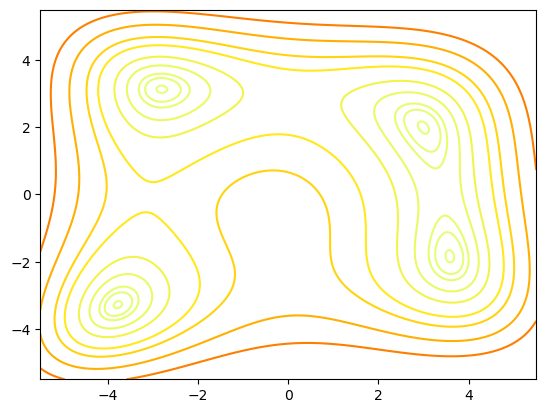

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def fncHimmelblau(x, fparam=None):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2;


def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')
    
contornosFnc2D(fncHimmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

_

```







```

---

## Ejercicio 4 (1.5 puntos)

Sea $f(x) = (x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia 

$$ x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) $$ 

con $0 < \alpha < 1$, para obtener el minimizador de la función $f(x)$.
Muestre que la secuencia $\{x_k\}$ converge a $1$. ¿Tiene este algoritmo
la propiedad de descenso, es decir, $f(x_{k+1}) < f(x_k)$ a partir de un
cierto $k$?

### Solución: